In [1]:
!pip install python-pptx


In [2]:
!pip install pandas numpy matplotlib seaborn openpyxl python-pptx


✅ Data loaded successfully.
Shape: (525461, 8)
Columns: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']
Cleaned Data Shape: (400916, 9)
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalSales  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom        83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom        81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom       100.8  
4 2009-12-01 07:45:00   1.25 

C:\Users\Dell\AppData\Local\Temp\ipykernel_9184\3303180461.py:61: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalSales'].sum()
C:\Users\Dell\AppData\Local\Temp\ipykernel_9184\3303180461.py:88: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_9184\3303180461.py:89: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.savefig(os.path.join(OUTPUT_DIR, "monthly_sales_trend.png"))
C:\Users\Dell\AppData\Local\Temp\ipykernel_9184\3303180461.py:89: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.savefig(os.path.join(OUTPUT_DIR, "monthly_sales_trend.png"))
C:\Users\Dell\AppData\Local\Temp\ipykernel_9184\3303180461.py:96: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel


📊 All charts saved in: online_retail_outputs

🎯 PowerPoint Report saved at: online_retail_outputs\OnlineRetailII_Report.pptx


c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


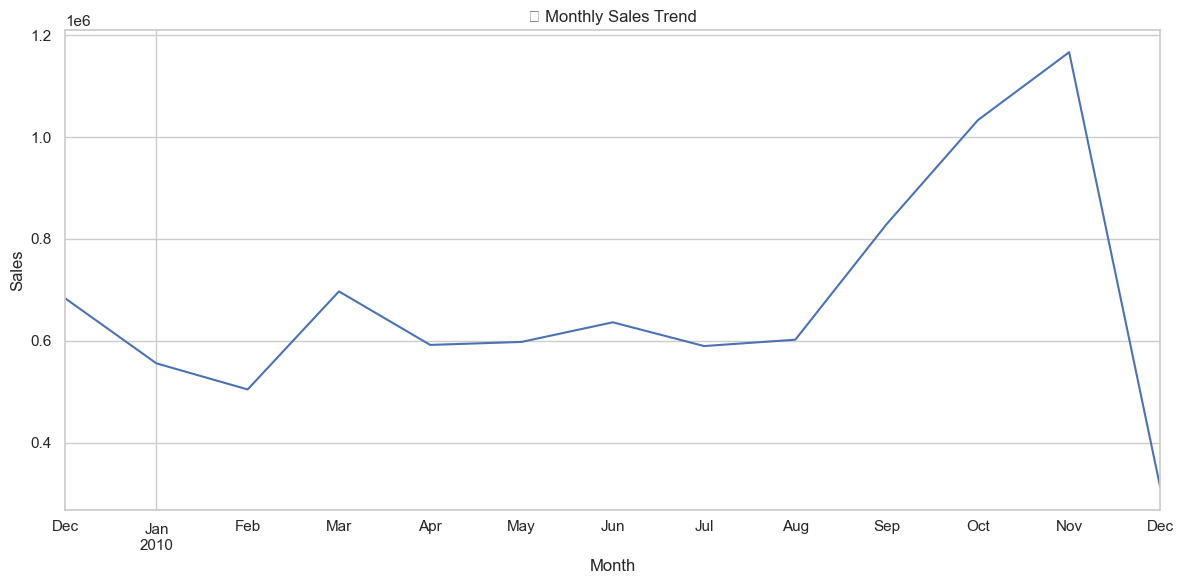

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


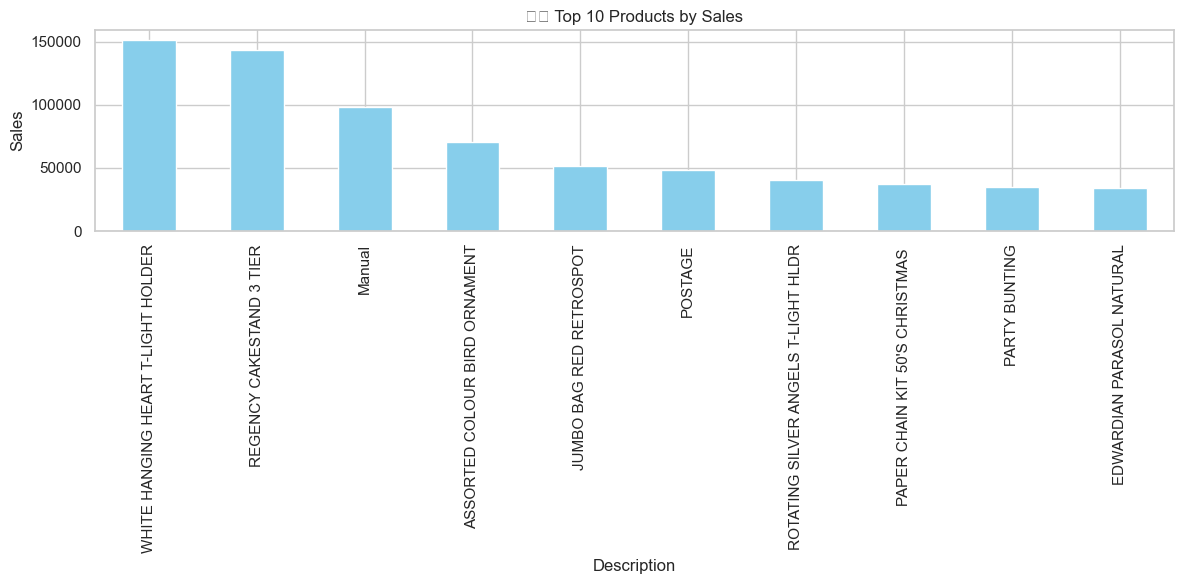

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


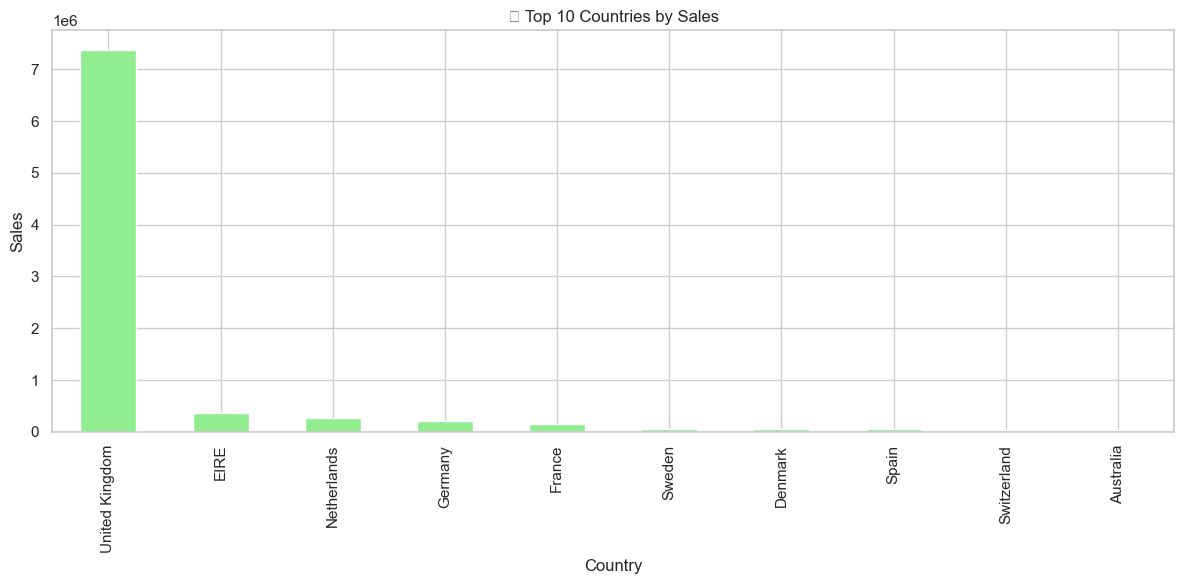

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


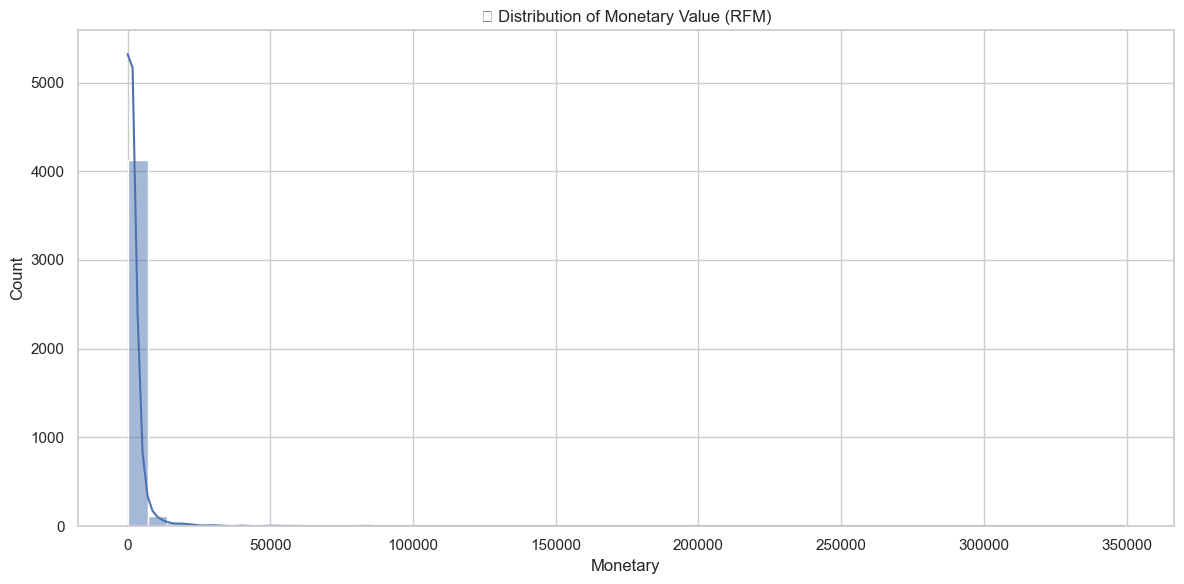

In [3]:
# 📦 Online Retail II Dataset Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pptx import Presentation
from pptx.util import Inches
import os

# ================================
# 1️⃣ Configuration
# ================================
DATA_PATH = r"C:\Users\Dell\Downloads\online_retail_II.xlsx"  # your dataset path
OUTPUT_DIR = "online_retail_outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ================================
# 2️⃣ Load Data
# ================================
df = pd.read_excel(DATA_PATH, sheet_name='Year 2009-2010')  # You can also try 'Year 2010-2011'
print("✅ Data loaded successfully.")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# ================================
# 3️⃣ Data Cleaning
# ================================
df.drop_duplicates(inplace=True)

# Remove canceled invoices (start with 'C')
df = df[~df['Invoice'].astype(str).str.startswith('C', na=False)]

# Convert date & numeric columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Create TotalSales column
df['TotalSales'] = df['Quantity'] * df['Price']

# Remove negative / missing values
df = df[(df['TotalSales'] > 0) & df['Customer ID'].notnull()]

print("Cleaned Data Shape:", df.shape)
print(df.head())

# ================================
# 4️⃣ Exploratory Data Analysis
# ================================
# Total sales
total_sales = df['TotalSales'].sum()
print(f"\n💰 Total Sales: {total_sales:,.2f}")

# Sales by country
sales_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
print("\n🌍 Top 10 Countries by Sales:")
print(sales_by_country)

# Monthly trend
monthly_sales = df.set_index('InvoiceDate').resample('M')['TotalSales'].sum()

# Top products
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# ================================
# 5️⃣ RFM Analysis
# ================================
latest_date = df['InvoiceDate'].max()
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalSales': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalSales': 'Monetary'}, inplace=True)

# ================================
# 6️⃣ Visualizations
# ================================
sns.set(style="whitegrid", rc={'figure.figsize': (12, 6)})

# Monthly Sales Trend
plt.figure()
monthly_sales.plot()
plt.title("📅 Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "monthly_sales_trend.png"))

# Top Products
plt.figure()
top_products.plot(kind='bar', color='skyblue')
plt.title("🏷️ Top 10 Products by Sales")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "top_products.png"))

# Country Sales
plt.figure()
sales_by_country.plot(kind='bar', color='lightgreen')
plt.title("🌎 Top 10 Countries by Sales")
plt.ylabel("Sales")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "country_sales.png"))

# RFM Monetary Distribution
plt.figure()
sns.histplot(rfm['Monetary'], bins=50, kde=True)
plt.title("💵 Distribution of Monetary Value (RFM)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "rfm_monetary.png"))

print("\n📊 All charts saved in:", OUTPUT_DIR)

# ================================
# 7️⃣ Create PowerPoint Report (Optional)
# ================================
prs = Presentation()
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "Online Retail II - Sales Analysis Report"
slide.placeholders[1].text = "Auto-generated using Python (pandas, matplotlib, pptx)"

def add_image_slide(title, image_file):
    slide = prs.slides.add_slide(prs.slide_layouts[5])
    slide.shapes.title.text = title
    slide.shapes.add_picture(image_file, Inches(1), Inches(1.5), height=Inches(4))

add_image_slide("Monthly Sales Trend", os.path.join(OUTPUT_DIR, "monthly_sales_trend.png"))
add_image_slide("Top Products", os.path.join(OUTPUT_DIR, "top_products.png"))
add_image_slide("Top Countries", os.path.join(OUTPUT_DIR, "country_sales.png"))
add_image_slide("RFM - Monetary Distribution", os.path.join(OUTPUT_DIR, "rfm_monetary.png"))

PPT_PATH = os.path.join(OUTPUT_DIR, "OnlineRetailII_Report.pptx")
prs.save(PPT_PATH)

print(f"\n🎯 PowerPoint Report saved at: {PPT_PATH}")
